In [ ]:
!pip install -Uqq fastai duckduckgo_search




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.5/234.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 29.2 MB/s eta 0:00:00


In [ ]:
# Check fastbook is installed
!pip install fastbook
# Import fastbook functions, in our case we'll be using: search_images_ddg
from fastbook import *
# create a function that will take an arbitrary search term and return a list of urls.
def search_images(term, max=30):
  print(f"Searching for '{term}'")
  # search_images_ddg comes from fastbook: https://github.com/fastai/fastbook/blob/master/utils.py#L45
  return search_images_ddg(term, max_images=max)


In [75]:
urls = search_images('ocean photos')
urls[0]

Searching for 'ocean photos'


'http://getwallpapers.com/wallpaper/full/3/f/f/384231.jpg'

Downloading Bird photos

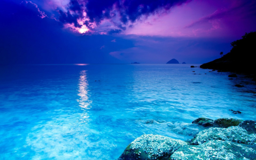

In [76]:
from fastdownload import download_url
dest = 'ocean.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Downloading Forest Photos

Searching for 'forest photos'


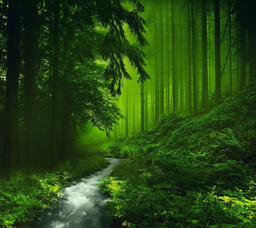

In [77]:
download_url(search_images('forest photos')[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

To download a bunch of ocean and forest images

In [78]:
searches = 'forest','ocean'
path = Path('ocean_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'ocean photo'
Searching for 'ocean sun photo'
Searching for 'ocean shade photo'


To handle broken urls

In [79]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

5

Train our model

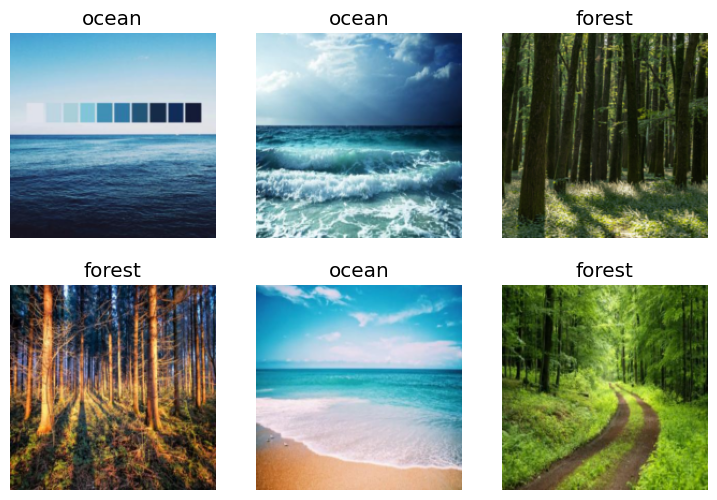

In [80]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   #input type and output type
    get_items=get_image_files,    #training set (images)
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  #train_test_split
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]    #transform the images to smaller sizes
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)



```
# This is formatted as code
```

We are using resnet34(CV model) to predict our results .

In [88]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.777331,0.272505,0.135593,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.105189,0.065829,0.033898,00:01
1,0.066655,0.065680,0.050847,00:01
2,0.047298,0.020042,0.000000,00:02
3,0.034056,0.020093,0.000000,00:02
4,0.043104,0.016841,0.000000,00:01


Based on the newly fine tuned model we make our predictions

In [91]:
is_ocean,_,probs = learn.predict(PILImage.create('forest.jpg'))
print(f"This is a: {is_ocean}.")
print(f"Probability it's an forest: {probs[0]:.4f}")

This is a: forest.
Probability it's an forest: 1.0000
